In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/har-dataset/Sitting/Sitting_151.mp4
/kaggle/input/har-dataset/Sitting/Sitting_22.mp4
/kaggle/input/har-dataset/Sitting/Sitting_16.mp4
/kaggle/input/har-dataset/Sitting/Sitting_179.mp4
/kaggle/input/har-dataset/Sitting/Sitting_147.mp4
/kaggle/input/har-dataset/Sitting/Sitting_81.mp4
/kaggle/input/har-dataset/Sitting/Sitting_14.mp4
/kaggle/input/har-dataset/Sitting/Sitting_131.mp4
/kaggle/input/har-dataset/Sitting/Sitting_150.mp4
/kaggle/input/har-dataset/Sitting/Sitting_90.mp4
/kaggle/input/har-dataset/Sitting/Sitting_114.mp4
/kaggle/input/har-dataset/Sitting/Sitting_198.mp4
/kaggle/input/har-dataset/Sitting/Sitting_116.mp4
/kaggle/input/har-dataset/Sitting/Sitting_15.mp4
/kaggle/input/har-dataset/Sitting/Sitting_69.mp4
/kaggle/input/har-dataset/Sitting/Sitting_132.mp4
/kaggle/input/har-dataset/Sitting/Sitting_140.mp4
/kaggle/input/har-dataset/Sitting/Sitting_13.mp4
/kaggle/input/har-dataset/Sitting/Sitting_169.mp4
/kaggle/input/har-dataset/Sitting/Sitting_18.mp4
/kaggle/i

In [3]:
import pathlib
from pathlib import Path
import pandas as pd
import os

In [4]:
dataset_root_path = pathlib.Path("/kaggle/input/har-dataset")
video_paths = list(dataset_root_path.glob("*/*.mp4"))
print(f"Number of videos: {len(video_paths)}")

Number of videos: 857


In [5]:
data = []

for path in video_paths:
    class_name = path.parent.name
    data.append({
        "path": str(path),
        "class": class_name
    })

df = pd.DataFrame(data)
print(f"Total filtered video entries: {len(df)}")
df.head()

Total filtered video entries: 857


,path,class
0,/kaggle/input/har-dataset/Sitting/Sitting_151.mp4,Sitting
1,/kaggle/input/har-dataset/Sitting/Sitting_22.mp4,Sitting
2,/kaggle/input/har-dataset/Sitting/Sitting_16.mp4,Sitting
3,/kaggle/input/har-dataset/Sitting/Sitting_179.mp4,Sitting
4,/kaggle/input/har-dataset/Sitting/Sitting_147.mp4,Sitting


In [6]:
print("Available activity classes:")
print(df['class'].unique())

Available activity classes:
['Sitting' 'Walking' 'Standing']


In [7]:
selected_classes = ['Sitting', 'Standing', 'Walking']

df_filtered = df[df['class'].isin(selected_classes)].reset_index(drop=True)
print(f"Filtered dataset size: {len(df_filtered)}")
df_filtered['class'].value_counts()

Filtered dataset size: 857


class
Walking     485
Sitting     198
Standing    174
Name: count, dtype: int64

In [8]:
class_map = {
    'Standing': 'standing',
    'Walking': 'walking',
    'Sitting': 'sitting'
}

df_filtered['label'] = df_filtered['class'].map(class_map)
df_filtered.head()

,path,class,label
0,/kaggle/input/har-dataset/Sitting/Sitting_151.mp4,Sitting,sitting
1,/kaggle/input/har-dataset/Sitting/Sitting_22.mp4,Sitting,sitting
2,/kaggle/input/har-dataset/Sitting/Sitting_16.mp4,Sitting,sitting
3,/kaggle/input/har-dataset/Sitting/Sitting_179.mp4,Sitting,sitting
4,/kaggle/input/har-dataset/Sitting/Sitting_147.mp4,Sitting,sitting


In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_filtered['label_idx'] = le.fit_transform(df_filtered['label'])

# Save label mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label mapping:", label_mapping)

Label mapping: {'sitting': 0, 'standing': 1, 'walking': 2}


In [10]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(
    df_filtered,
    test_size=0.2,
    stratify=df_filtered['label_idx'],
    random_state=42
)

print(f"Train size: {len(train_df)}, Test size: {len(test_df)}")


Train size: 685, Test size: 172


In [11]:
train_df['class'].value_counts()

class
Walking     388
Sitting     158
Standing    139
Name: count, dtype: int64

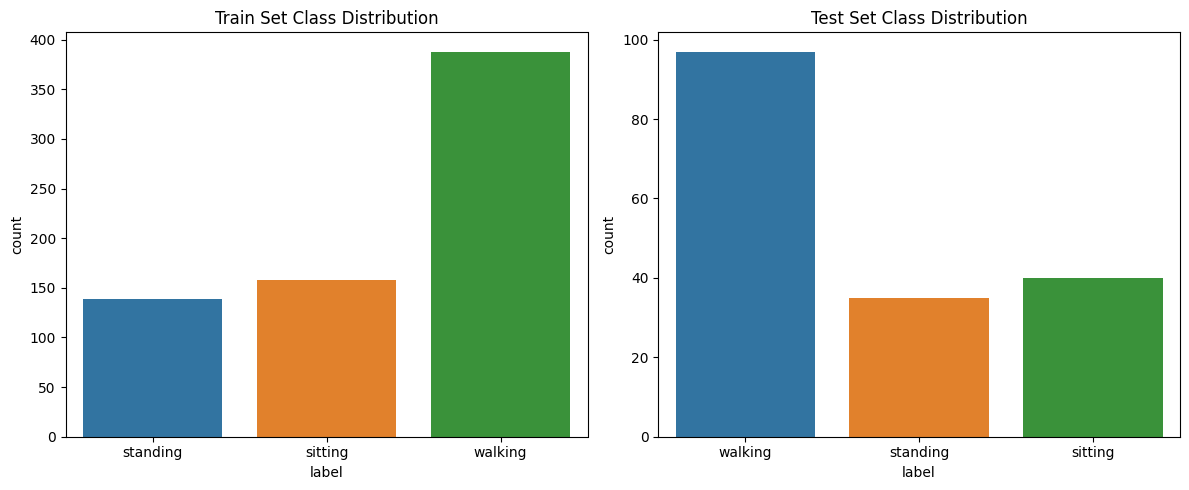

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x='label', data=train_df, ax=axs[0])
axs[0].set_title('Train Set Class Distribution')

sns.countplot(x='label', data=test_df, ax=axs[1])
axs[1].set_title('Test Set Class Distribution')

plt.tight_layout()
plt.show()

In [13]:
# Loading sample video
sample_path = train_df.iloc[9]['path']
print("Sample video path:", sample_path)

Sample video path: /kaggle/input/har-dataset/Sitting/Sitting_170.mp4


In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def read_video_frames(video_path, num_frames=8):
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_idxs = np.linspace(0, total_frames - 1, num_frames).astype(int)

    frames = []
    for i in range(total_frames):
        ret, frame = cap.read()
        if i in frame_idxs and ret:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(frame)
    cap.release()
    return frames

frames = read_video_frames(sample_path, num_frames=8)


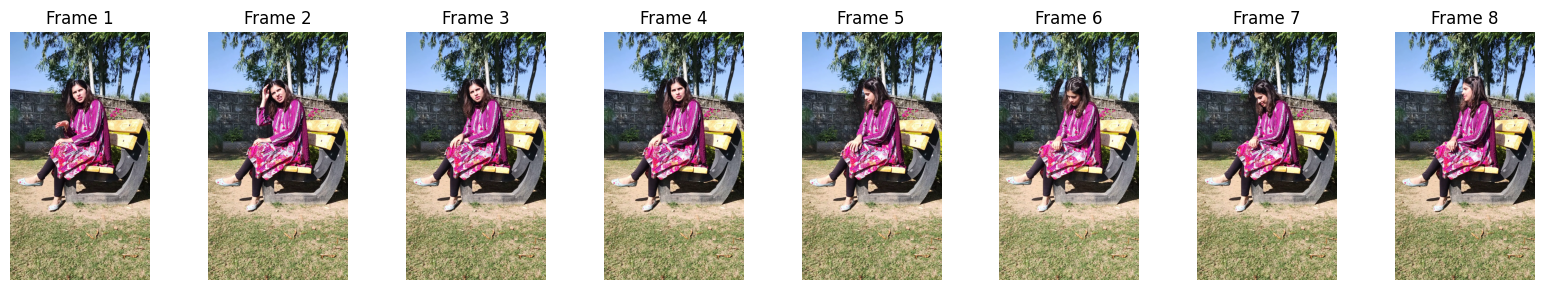

In [15]:
# Plotting sample frames
plt.figure(figsize=(16, 3))
for i, frame in enumerate(frames):
    plt.subplot(1, len(frames), i+1)
    plt.imshow(frame)
    plt.axis('off')
    plt.title(f'Frame {i+1}')
plt.tight_layout()
plt.show()

In [16]:
import torch
from torch.utils.data import Dataset
from torchvision import transforms

class VideoClipDataset(Dataset):
    def __init__(self, dataframe, num_frames=8, image_size=224):
        self.df = dataframe.reset_index(drop=True)
        self.num_frames = num_frames
        self.transform = transforms.Compose([
            transforms.ToPILImage(),
            transforms.Resize((image_size, image_size)),
            transforms.ToTensor(),  # (C, H, W)
            transforms.Normalize([0.5]*3, [0.5]*3)
        ])

    def __len__(self):
        return len(self.df)

    def read_frames(self, video_path):
        cap = cv2.VideoCapture(video_path)
        total = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        idxs = np.linspace(0, total - 1, self.num_frames).astype(int)

        frames = []
        for i in range(total):
            ret, frame = cap.read()
            if i in idxs and ret:
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                frames.append(self.transform(frame))  # (C, H, W)

        cap.release()
        return torch.stack(frames)  # (T, C, H, W)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        frames = self.read_frames(row['path'])  # (T, C, H, W)
        label = row['label_idx']
        return frames, label

In [17]:
from torch.utils.data import DataLoader

train_dataset = VideoClipDataset(train_df, num_frames=8)
test_dataset = VideoClipDataset(test_df, num_frames=8)


train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=True, num_workers=2)

In [18]:
sample_batch = next(iter(train_loader))
print("Batch video shape:", sample_batch[0].shape)  # (B, T, C, H, W)
print("Batch labels:", sample_batch[1])

Batch video shape: torch.Size([4, 8, 3, 224, 224])
Batch labels: tensor([2, 2, 0, 2])


In [19]:
import timm
import torch.nn as nn

class ViTActivityClassifier(nn.Module):
    def __init__(self, num_classes=3, vit_name='vit_base_patch16_224'):
        super().__init__()
        self.vit = timm.create_model(vit_name, pretrained=False)
        self.vit.head = nn.Identity()  # remove classification head

        self.temporal_pooling = nn.AdaptiveAvgPool1d(1)  # average across frames
        self.classifier = nn.Linear(self.vit.num_features, num_classes)

    def forward(self, x):
        # x: (B, T, C, H, W)
        B, T, C, H, W = x.shape
        x = x.view(B * T, C, H, W)
        feats = self.vit(x)  # (B*T, feat_dim)

        feats = feats.view(B, T, -1).transpose(1, 2)  # (B, feat_dim, T)
        pooled = self.temporal_pooling(feats).squeeze(2)  # (B, feat_dim)
        out = self.classifier(pooled)  # (B, num_classes)
        return out

In [20]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = ViTActivityClassifier(num_classes=3).to(device)

# Test one batch forward
x, y = sample_batch
x = x.to(device)
out = model(x)  # (B, 3)
print("Output logits shape:", out.shape)

Output logits shape: torch.Size([4, 3])


In [21]:
import torch.nn as nn
import torch.optim as optim

# Calculate class weights (Inverse frequency approach)
class_counts = train_df['label_idx'].value_counts()
class_weights = 1.0 / torch.tensor(class_counts, dtype=torch.float32)
class_weights = class_weights / class_weights.sum()  # Normalize to sum to 1

# Modified the criterion with class weights
criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))  
optimizer = optim.Adam(model.parameters(), lr=1e-4)

In [22]:
def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    total_loss, correct, total = 0.0, 0, 0

    for inputs, labels in loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        preds = outputs.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    acc = correct / total
    return total_loss / len(loader), acc

In [ ]:
epochs = 25
train_accuracies = []
train_losses = []

for epoch in range(epochs):
    loss, acc = train_one_epoch(model, train_loader, optimizer, criterion, device)
    print(f"Epoch {epoch+1}: Loss = {loss:.4f}, Accuracy = {acc:.4f}")
    train_losses.append(loss)
    train_accuracies.append(acc)

In [ ]:
# Accuracy/Loss curves
plt.figure(figsize=(10, 5))
plt.plot(range(epochs), train_accuracies, label='Training Accuracy')
plt.plot(range(epochs), train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/ Loss')
plt.legend()
plt.title('Training Accuracy/ Loss vs Epochs')
plt.show()

In [ ]:
def evaluate(model, loader, device, class_names):
    model.eval()
    y_true, y_pred = [], []
    y_pred_proba = []  

    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            preds = model(x).argmax(dim=1)
            probs = model(x)  

            y_true.extend(y.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
            y_pred_proba.extend(probs.cpu().numpy())  

    # Return values for plotting outside the function
    return np.array(y_true), np.array(y_pred), np.array(y_pred_proba)

# Get the true labels, predicted labels, and probabilities
y_true, y_pred, y_pred_proba = evaluate(model, test_loader, device, class_names=le.classes_)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, precision_recall_curve, roc_curve, auc, f1_score, precision_score, recall_score, confusion_matrix

# Classification Report
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred) 
target_names = le.classes_
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names) 
plt.title("Confusion Matrix") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.show()

In [ ]:
# Precision-Recall Curve (for multiclass)
plt.figure(figsize=(8, 6))
for i in range(len(le.classes_)):
    precision, recall, _ = precision_recall_curve(np.array(y_true) == i, np.array(y_pred_proba)[:, i])
    plt.plot(recall, precision, label=f'Class {le.classes_[i]}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Multiclass)')
plt.legend(loc='best')
plt.show()

In [ ]:
# ROC Curve (for Multiclass)
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(le.classes_)
y_true_bin = np.eye(n_classes)[y_true]  # One-hot encoding of true labels

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], np.array(y_pred_proba)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.figure(figsize=(8, 6))
    plt.plot(fpr[i], tpr[i], color='olive', lw=2, label=f'Class {le.classes_[i]} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Class: {le.classes_[i]}')
    plt.legend(loc='lower right')
    plt.show()


In [ ]:
# Classwise F1-Score
f1_scores = f1_score(y_true, y_pred, average=None)

plt.bar(le.classes_, f1_scores, color='seagreen')
plt.xlabel('Class')
plt.ylabel('F1-Score')
plt.title('Class-wise F1-Score')
plt.show()

In [ ]:
# Classwise Precision and Recall
precision_class = precision_score(y_true, y_pred, average=None)
recall_class = recall_score(y_true, y_pred, average=None)

df_scores = pd.DataFrame({'Class': le.classes_,
                          'Precision': precision_class,
                          'Recall': recall_class})

df_scores.plot(x='Class', kind='bar', figsize=(10, 6), title='Class-wise Precision and Recall')
plt.ylabel('Score')
plt.show()

In [ ]:
# Cumulative gain curve for our model
def cumulative_gain(y_true, y_prob):
    order = np.argsort(y_prob)[::-1]
    y_true_sorted = y_true[order]
    gain = np.cumsum(y_true_sorted) / np.sum(y_true_sorted)
    plt.figure(figsize=(8, 6))
    plt.plot(np.linspace(0, 1, len(gain)), gain, label='Model')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random')
    plt.xlabel('Percentage of samples')
    plt.ylabel('Cumulative gain')
    plt.title('Cumulative Gain Curve')
    plt.legend(loc='best')
    plt.show()

cumulative_gain(y_true, y_pred_proba[:, 1])


In [ ]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_true, y_pred)
print(f"Cohen's Kappa Score: {kappa:.3f}")


In [ ]:
from sklearn.metrics import average_precision_score

# Compute AUPRC for each class (one-vs-rest)
auprc = []
for i in range(len(le.classes_)):
    ap = average_precision_score(np.array(y_true) == i, np.array(y_pred_proba)[:, i])
    auprc.append(ap)

# Plot AUPRC for each class
plt.bar(le.classes_, auprc, color='gray')
plt.xlabel('Class')
plt.ylabel('AUPRC')
plt.title('Area Under Precision-Recall Curve (AUPRC) for Each Class')
plt.show()


In [ ]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_true, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.3f}")


In [47]:
# Save only the model weights
torch.save(model.state_dict(), "final_vit_activity.pth")
print("Model weights saved successfully!")


Model weights saved successfully!


In [ ]:
# Save full model
torch.save(model, "final_vit_activity_full.pth")
print("Full model saved successfully!")


In [ ]:
model = ViTActivityClassifier(num_classes=3).to(device)
model.load_state_dict(torch.load("/kaggle/input/new-checkpoint-model/transformers/default/1/vit_activity_new_weights.pth"))
model.eval()


In [24]:
from torchinfo import summary

summary(model, input_size= [1, 8, 3, 224, 224])

Layer (type:depth-idx)                        Output Shape              Param #
ViTActivityClassifier                         [1, 3]                    --
├─VisionTransformer: 1-1                      [8, 768]                  152,064
│    └─PatchEmbed: 2-1                        [8, 196, 768]             --
│    │    └─Conv2d: 3-1                       [8, 768, 14, 14]          590,592
│    │    └─Identity: 3-2                     [8, 196, 768]             --
│    └─Dropout: 2-2                           [8, 197, 768]             --
│    └─Identity: 2-3                          [8, 197, 768]             --
│    └─Identity: 2-4                          [8, 197, 768]             --
│    └─Sequential: 2-5                        [8, 197, 768]             --
│    │    └─Block: 3-3                        [8, 197, 768]             7,087,872
│    │    └─Block: 3-4                        [8, 197, 768]             7,087,872
│    │    └─Block: 3-5                        [8, 197, 768]            

# Model Quantization

In [25]:
!pip install -q onnxruntime onnxruntime-tools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 89.7 MB/s eta 0:00:00:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.7/212.7 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 4.7 MB/s eta 0:00:00


In [26]:
import random
from torch.utils.data import Subset, DataLoader

# pick 300 clips from train_dataset (or test_dataset is fine too)
num_calib = min(300, len(train_dataset))
calib_idxs = random.sample(range(len(train_dataset)), num_calib)
calib_subset = Subset(train_dataset, calib_idxs)

calib_loader = DataLoader(
    calib_subset,
    batch_size=4,
    shuffle=False,
    num_workers=2,
    pin_memory=True,
)


In [27]:
import torch.nn.utils.prune as prune
from copy import deepcopy

def global_unstructured_prune(m: nn.Module, amount=0.3, layers=(nn.Linear, nn.Conv2d)):
    params = [(mod, "weight") for mod in m.modules() if isinstance(mod, layers)]
    prune.global_unstructured(params, pruning_method=prune.L1Unstructured, amount=amount)
    # make pruning permanent (remove reparameterization)
    for mod, _ in params:
        prune.remove(mod, "weight")
    return m

# keep a teacher copy just in case you want distillation later
teacher = deepcopy(model).eval()

# create a pruned copy so you don't mutate your baseline
pruned_model = deepcopy(model)
pruned_model = global_unstructured_prune(pruned_model, amount=0.3)


In [52]:
!pip install -q onnx onnxscript

In [51]:
import torch, os

# Make sure your pruned model is on CPU for export
pruned_model = pruned_model.to("cpu").eval()

# Dummy input with same shape as your real data (B,T,C,H,W)
dummy = torch.randn(1, 8, 3, 224, 224, dtype=torch.float32)

# Define the ONNX file path
onnx_pruned_fp32 = "/kaggle/working/model_pruned_fp32.onnx"

# Export
with torch.no_grad():
    torch.onnx.export(
        pruned_model,
        dummy,
        onnx_pruned_fp32,
        input_names=["video"],
        output_names=["logits"],
        opset_version=17,
        do_constant_folding=True,
        dynamic_axes={"video": {0: "batch"}, "logits": {0: "batch"}},
    )

print("Exported:", onnx_pruned_fp32, "size:", os.path.getsize(onnx_pruned_fp32), "bytes")

/usr/local/lib/python3.11/dist-packages/torch/__init__.py:2132: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  assert condition, message


Exported: /kaggle/working/model_pruned_fp32.onnx size: 343354848 bytes


In [30]:
import onnx
onnx.checker.check_model(onnx.load(onnx_pruned_fp32))
print("ONNX checker: OK")

ONNX checker: OK


In [31]:
from onnxruntime.quantization import quantize_dynamic, QuantType

onnx_pruned_int8_dyn = "/kaggle/working/model_pruned_int8_dynamic.onnx"
quantize_dynamic(
    model_input=onnx_pruned_fp32,
    model_output=onnx_pruned_int8_dyn,
    weight_type=QuantType.QInt8   # or QuantType.QUInt8
)
print("Wrote:", onnx_pruned_int8_dyn, "size:", os.path.getsize(onnx_pruned_int8_dyn))

Wrote: /kaggle/working/model_pruned_int8_dynamic.onnx size: 86902347


In [32]:
import numpy as np
from onnxruntime.quantization import (
    CalibrationDataReader, quantize_static, QuantType, CalibrationMethod
)

class ORTCalibData(CalibrationDataReader):
    def __init__(self, loader, input_name="video"):
        self.input_name = input_name
        self.enum = self._enumerate(loader)
    def _enumerate(self, loader):
        for batch in loader:
            if isinstance(batch, (list, tuple)):
                x = batch[0]
            elif isinstance(batch, dict):
                x = batch["video"]
            else:
                raise ValueError("Unexpected batch format")
            # ONNX Runtime expects numpy
            yield {self.input_name: x.cpu().numpy().astype(np.float32)}
    def get_next(self):
        return next(self.enum, None)

onnx_pruned_int8_static = "/kaggle/working/model_pruned_int8_static.onnx"
calib_reader = ORTCalibData(calib_loader, input_name="video")

quantize_static(
    model_input=onnx_pruned_fp32,
    model_output=onnx_pruned_int8_static,
    calibration_data_reader=calib_reader,
    weight_type=QuantType.QInt8,
    activation_type=QuantType.QInt8,
    calibrate_method=CalibrationMethod.MinMax 
)
print("Wrote:", onnx_pruned_int8_static, "size:", os.path.getsize(onnx_pruned_int8_static))

Wrote: /kaggle/working/model_pruned_int8_static.onnx size: 86458068


In [33]:
# !pip install -q onnxruntime
import onnxruntime as ort, numpy as np

sess = ort.InferenceSession(onnx_pruned_int8_static, providers=["CPUExecutionProvider"])
x = np.random.randn(1, 8, 3, 224, 224).astype("float32")
y = sess.run(None, {"video": x})
print("ONNX INT8 output shape:", [o.shape for o in y])

ONNX INT8 output shape: [(1, 3)]


In [34]:
import torch
from torch.ao.quantization import get_default_qconfig
from torch.ao.quantization.quantize_fx import prepare_fx, convert_fx
from torch.ao.quantization.qconfig_mapping import QConfigMapping
from torch.ao.quantization.qconfig import QConfig
from torch.ao.quantization.observer import HistogramObserver, PerChannelMinMaxObserver

torch.backends.quantized.engine = "fbgemm"  # for x86 CPU

def ptq_int8_fx(model, calib_loader):
    model = model.eval()

  
    first_batch = next(iter(calib_loader))
    if isinstance(first_batch, (list, tuple)):
        x = first_batch[0]
    elif isinstance(first_batch, dict):
        x = first_batch["video"]
    else:
        x = first_batch
    if x.dim() == 4:  # (B,C,H,W) → add time dim
        x = x.unsqueeze(1)
    example_inputs = (x[:1].contiguous(),)

   
    act_obs = HistogramObserver.with_args(dtype=torch.quint8, qscheme=torch.per_tensor_affine)
    w_obs = PerChannelMinMaxObserver.with_args(dtype=torch.qint8, qscheme=torch.per_channel_symmetric, ch_axis=0)
    qconfig = QConfig(activation=act_obs, weight=w_obs)

    qmap = (
        QConfigMapping()
        .set_global(qconfig)
        .set_object_type(torch.nn.LayerNorm, None)   # keep LN in FP32
        .set_object_type(torch.nn.Softmax, None)     # keep Softmax in FP32
    )

    prepared = prepare_fx(model, qmap, example_inputs=example_inputs)

    
    with torch.no_grad():
        for batch in calib_loader:
            if isinstance(batch, (list, tuple)):
                xb = batch[0]
            elif isinstance(batch, dict):
                xb = batch["video"]
            else:
                xb = batch
            if xb.dim() == 4:
                xb = xb.unsqueeze(1)
            prepared(xb)

   
    int8_model = convert_fx(prepared).eval()
    return int8_model

In [50]:
!pip install torchinfo
from torchinfo import summary

int8_ptq = ptq_int8_fx(pruned_model, calib_loader)  # PyTorch INT8 model


summary(int8_ptq, input_size=(1, 8, 3, 224, 224), device="cpu")

<eval_with_key>.11:42: UserWarning: All inputs of this cat operator must share the same quantization parameters. Otherwise large numerical inaccuracies may occur. (Triggered internally at /pytorch/aten/src/ATen/native/quantized/cpu/TensorShape.cpp:168.)
  cat = torch.cat([quantize_per_tensor_7, vit_patch_embed_norm], dim = 1);  quantize_per_tensor_7 = vit_patch_embed_norm = None


Layer (type:depth-idx)                        Output Shape              Param #
GraphModule                                   [1, 3]                    --
├─Module: 1-1                                 --                        152,064
│    └─Module: 2-1                            --                        --
│    │    └─Conv2d: 3-1                       [8, 768, 14, 14]          --
│    │    └─Identity: 3-2                     [8, 196, 768]             --
│    └─Dropout: 2-2                           [8, 197, 768]             --
│    └─Identity: 2-3                          [8, 197, 768]             --
│    └─Identity: 2-4                          [8, 197, 768]             --
│    └─Module: 2-5                            --                        --
│    │    └─Module: 3-3                       --                        3,072
│    │    └─Module: 3-4                       --                        3,072
│    │    └─Module: 3-5                       --                        3,072
│    │

ONNX I/O: video -> logits
Classes: ['sitting', 'standing', 'walking']
              precision    recall  f1-score   support

     sitting     0.6452    1.0000    0.7843        40
    standing     1.0000    0.0286    0.0556        35
     walking     0.7798    0.8763    0.8252        97

    accuracy                         0.7326       172
   macro avg     0.8083    0.6350    0.5550       172
weighted avg     0.7933    0.7326    0.6591       172

              precision    recall  f1-score   support

     sitting     0.6452    1.0000    0.7843        40
    standing     1.0000    0.0286    0.0556        35
     walking     0.7798    0.8763    0.8252        97

    accuracy                         0.7326       172
   macro avg     0.8083    0.6350    0.5550       172
weighted avg     0.7933    0.7326    0.6591       172



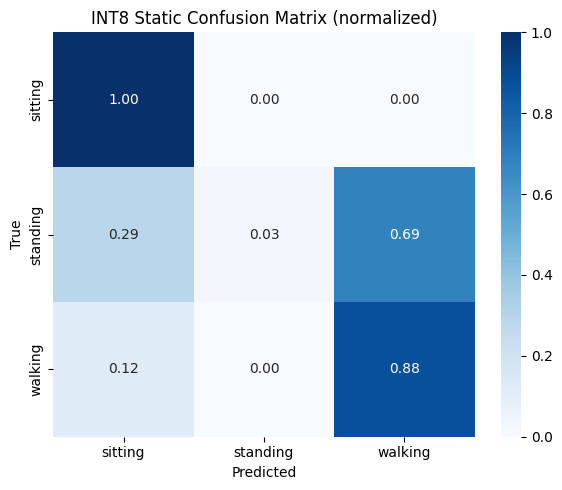

Saved CF image to: /kaggle/working/confusion_matrix_pruned_static.png


In [48]:
# !pip install -q onnx onnxruntime scikit-learn
import onnxruntime as ort, numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

onnx_path = "/kaggle/working/model_pruned_int8_static.onnx"  
sess = ort.InferenceSession(onnx_path, providers=["CPUExecutionProvider"])
inp_name = sess.get_inputs()[0].name
out_name = sess.get_outputs()[0].name
print("ONNX I/O:", inp_name, "->", out_name)

# Collect predictions & labels
y_true, y_pred = [], []
for batch in test_loader:
    if isinstance(batch, (list, tuple)):
        x, y = batch[0], batch[1]
    elif isinstance(batch, dict):
        x, y = batch["video"], batch["label"]
    else:
        raise ValueError("Unexpected batch type")
    logits = sess.run([out_name], {inp_name: x.cpu().numpy().astype(np.float32)})[0]
    y_pred.append(np.argmax(logits, axis=1))
    y_true.append(y.cpu().numpy())
y_true = np.concatenate(y_true)
y_pred = np.concatenate(y_pred)

# Determine labels actually present
labels = np.unique(np.concatenate([y_true, y_pred]))

class_names = ["sitting", "standing", "walking"]
print("Classes:", class_names)

# Metrics
cm = confusion_matrix(y_true, y_pred, labels=labels)
print(classification_report(y_true, y_pred, labels=labels, target_names=class_names, digits=4))

# Plot confusion matrix
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred, labels=[0,1,2])
print(classification_report(y_true, y_pred, labels=[0,1,2], target_names=class_names, digits=4))

def plot_cm_seaborn(cm, class_names, normalize=True, fname="/kaggle/working/confusion_matrix_pruned_static.png"):
    if normalize:
        cm = cm.astype(np.float64)
        rs = cm.sum(axis=1, keepdims=True)
        rs[rs == 0] = 1.0
        cm = cm / rs
    plt.figure(figsize=(6,5))
    ax = sns.heatmap(
        cm, annot=True, fmt=".2f" if normalize else "d",
        xticklabels=class_names, yticklabels=class_names,
        cmap="Blues", cbar=True)
    ax.set_title("INT8 Static Confusion Matrix" + (" (normalized)" if normalize else ""))
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")
    plt.tight_layout()
    plt.savefig(fname, dpi=200)
    plt.show()
    print("Saved CF image to:", fname)

plot_cm_seaborn(cm, class_names, normalize=True)

ONNX I/O: video -> logits
Classes: ['sitting', 'standing', 'walking']
              precision    recall  f1-score   support

     sitting     0.6897    1.0000    0.8163        40
    standing     1.0000    0.0286    0.0556        35
     walking     0.7699    0.8969    0.8286        97

    accuracy                         0.7442       172
   macro avg     0.8199    0.6418    0.5668       172
weighted avg     0.7981    0.7442    0.6684       172

              precision    recall  f1-score   support

     sitting     0.6897    1.0000    0.8163        40
    standing     1.0000    0.0286    0.0556        35
     walking     0.7699    0.8969    0.8286        97

    accuracy                         0.7442       172
   macro avg     0.8199    0.6418    0.5668       172
weighted avg     0.7981    0.7442    0.6684       172



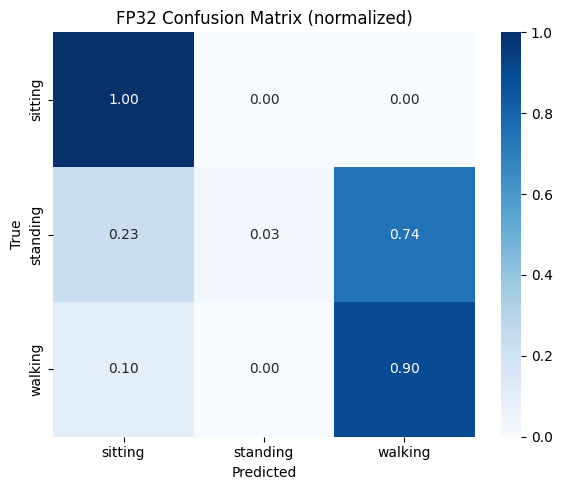

Saved CF image to: /kaggle/working/confusion_matrix_pruned_fp32.png


In [49]:
# !pip install -q onnx onnxruntime scikit-learn
import onnxruntime as ort, numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

onnx_path = "/kaggle/working/model_pruned_fp32.onnx"  # or FP32 ONNX
sess = ort.InferenceSession(onnx_path, providers=["CPUExecutionProvider"])
inp_name = sess.get_inputs()[0].name
out_name = sess.get_outputs()[0].name
print("ONNX I/O:", inp_name, "->", out_name)

# Collect predictions & labels
y_true, y_pred = [], []
for batch in test_loader:
    if isinstance(batch, (list, tuple)):
        x, y = batch[0], batch[1]
    elif isinstance(batch, dict):
        x, y = batch["video"], batch["label"]
    else:
        raise ValueError("Unexpected batch type")
    logits = sess.run([out_name], {inp_name: x.cpu().numpy().astype(np.float32)})[0]
    y_pred.append(np.argmax(logits, axis=1))
    y_true.append(y.cpu().numpy())
y_true = np.concatenate(y_true)
y_pred = np.concatenate(y_pred)

# Determine labels actually present
labels = np.unique(np.concatenate([y_true, y_pred]))

class_names = ["sitting", "standing", "walking"]
print("Classes:", class_names)

# Metrics
cm = confusion_matrix(y_true, y_pred, labels=labels)
print(classification_report(y_true, y_pred, labels=labels, target_names=class_names, digits=4))

# Plot confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred, labels=[0,1,2])
print(classification_report(y_true, y_pred, labels=[0,1,2], target_names=class_names, digits=4))

def plot_cm_seaborn(cm, class_names, normalize=True, fname="/kaggle/working/confusion_matrix_pruned_fp32.png"):
    if normalize:
        cm = cm.astype(np.float64)
        rs = cm.sum(axis=1, keepdims=True)
        rs[rs == 0] = 1.0
        cm = cm / rs
    plt.figure(figsize=(6,5))
    ax = sns.heatmap(
        cm, annot=True, fmt=".2f" if normalize else "d",
        xticklabels=class_names, yticklabels=class_names,
        cmap="Blues", cbar=True)
    ax.set_title("FP32 Confusion Matrix" + (" (normalized)" if normalize else ""))
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")
    plt.tight_layout()
    plt.savefig(fname, dpi=200)
    plt.show()
    print("Saved CF image to:", fname)

plot_cm_seaborn(cm, class_names, normalize=True)

In [42]:
import numpy as np
standing_row = cm[1]
print("Standing misclassified as:", {name:int(count) for name,count in zip(class_names, standing_row)})


Standing misclassified as: {'class_0': 10, 'class_1': 1, 'class_2': 24}
